In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sequential_sampler import SMCSampler1

import torch
from torch.distributions import MultivariateNormal

In [88]:
N = 50000
x0 = torch.randn(N,1)
w0 = torch.ones(N)/N
T = 30
target_log_densities = [MultivariateNormal(torch.tensor([float(i)]), torch.eye(1)).log_prob for i in range(T)]
smc = SMCSampler1(target_log_densities, x0, w0)
smc.sample()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [01:02<00:00,  2.16s/it]


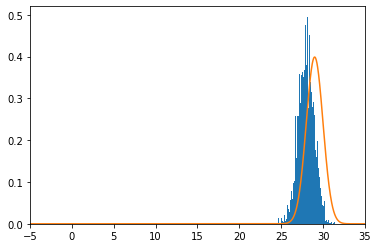

In [6]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-5, 35,1000).unsqueeze(-1)
for i,particle_set in enumerate(smc.particles):
    clear_output(wait=True)
    plt.figure()
    plt.hist(particle_set.detach().numpy(), bins= 100, density = True)
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.xlim((-5,35))
    plt.show()

In [65]:
from targets.variational_inference_target import * 

In [66]:
T = 10
target = Dimension1()

2721128858096


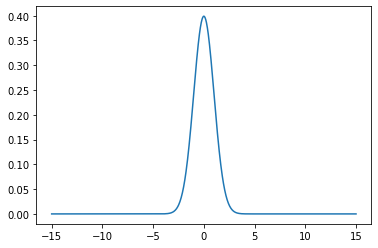

2721128859104


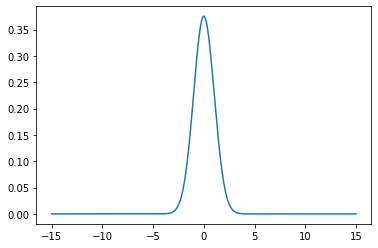

2721139120016


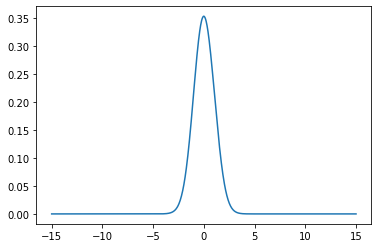

2721139121024


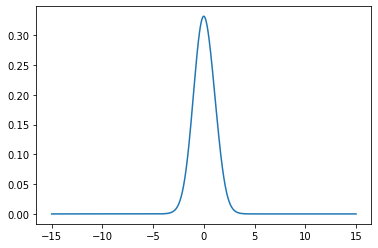

2721139119584


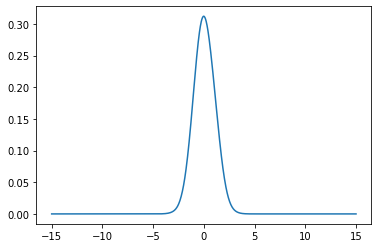

2721139121168


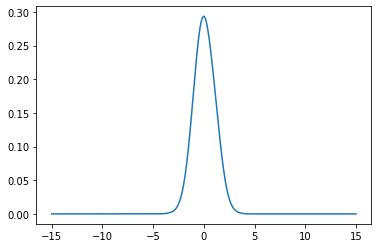

2721139120880


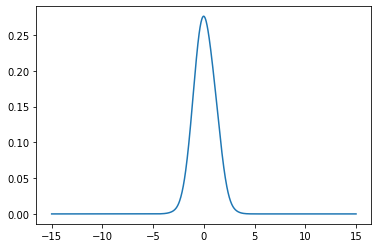

2721210987280


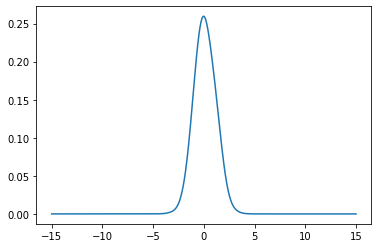

2721210987136


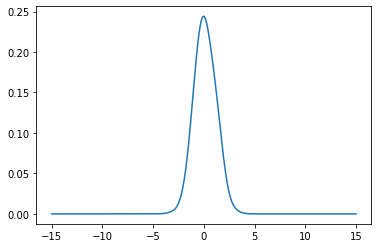

2721210986992


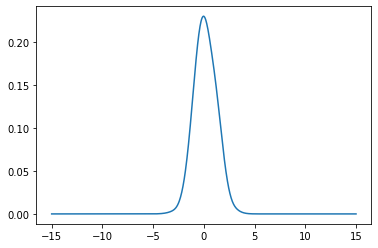

2721210986848


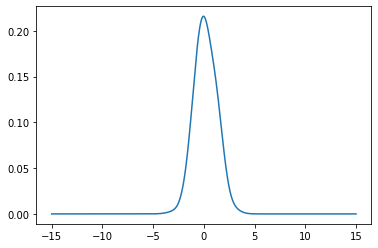

2721210986560


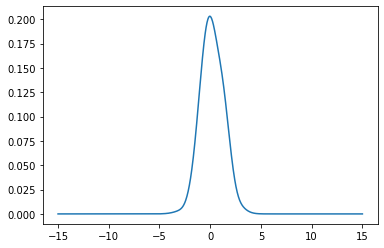

2721210986704


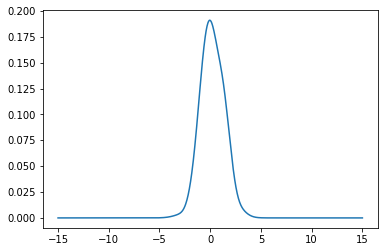

2721210987568


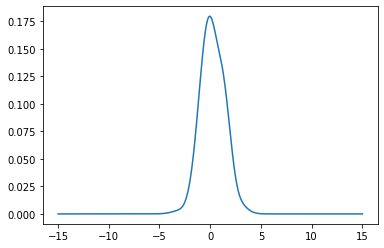

2721210987712


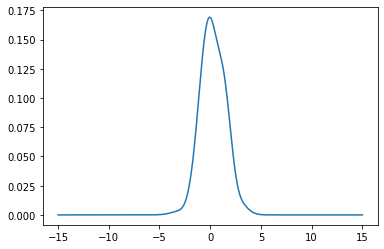

2721210987856


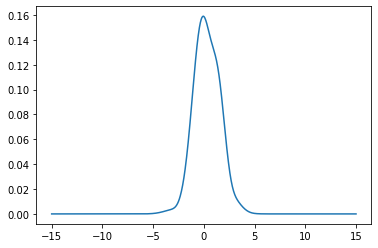

2721210988000


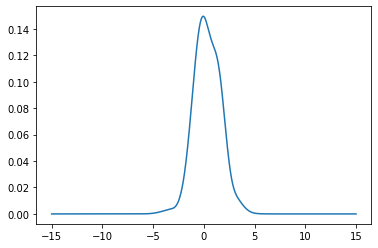

2721210988144


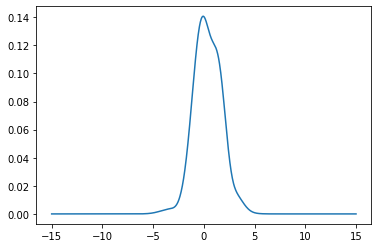

2721210988288


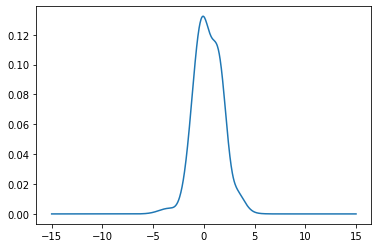

2721210988432


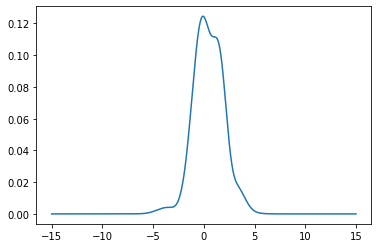

2721210988576


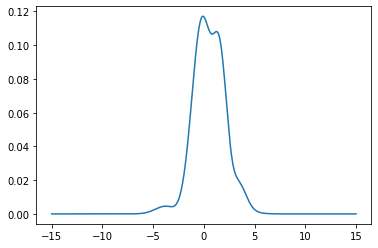

2721210988720


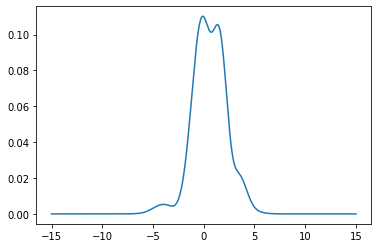

2721210988864


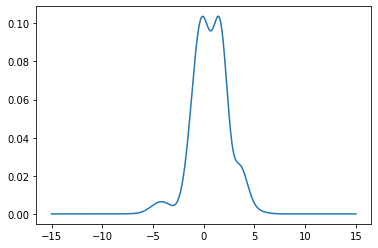

2721210989008


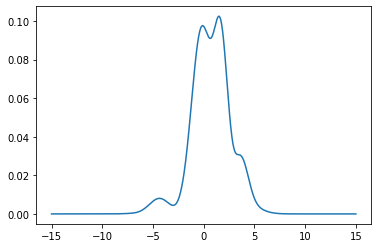

2721210989152


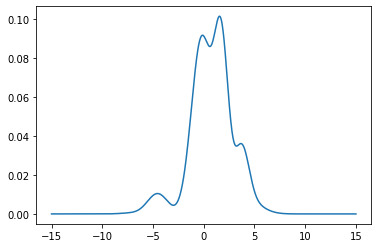

2721210989296


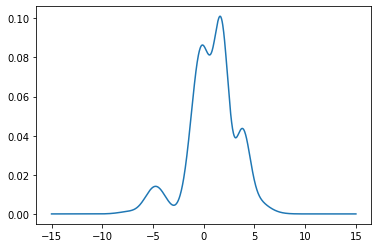

2721210989440


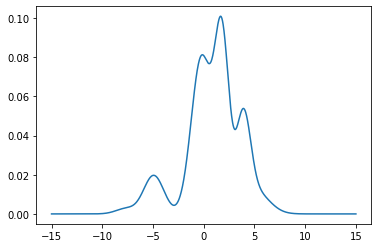

2721210989584


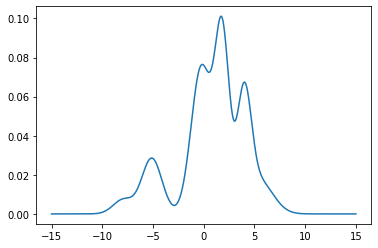

2721210989728


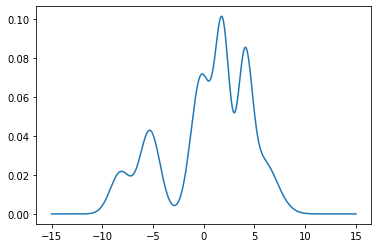

2721210989872


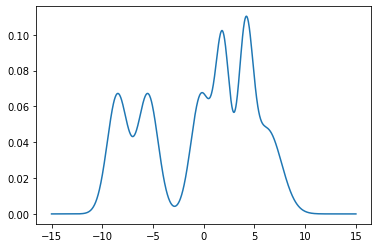

In [82]:
def interpolation(t, target_log_density):
    return lambda samples : (1-t/(T-1))*MultivariateNormal(torch.zeros(1), torch.eye(1)).log_prob(samples) + t/(T-1)*target.log_prob(samples)
target_log_densities = [interpolation(t, target.log_prob) for t in range(T)]

from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-15, 15,1000).unsqueeze(-1)
for i in range(T):
    #clear_output(wait=True)
    print(id(target_log_densities[i]))
    plt.figure()
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.show()

In [84]:
smc = SMCSampler1(target_log_densities, x0, w0)
#smc.plot_all_densities()
smc.sample()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:44<00:00,  1.53s/it]


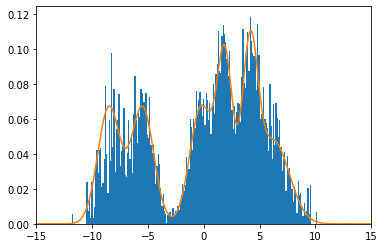

In [87]:
for i,particle_set in enumerate(smc.particles):
    clear_output(wait=True)
    plt.figure()
    temp = particle_set.squeeze(-1).detach().numpy()
    plt.hist(particle_set.squeeze(-1).detach().numpy(), bins= 200, density = True, weights = smc.weights[i].detach().numpy())
    linspace= torch.linspace(-15, 15,1000).unsqueeze(-1)
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.xlim((-15,15))
    plt.show()